## Justification or answer summary needed for every question

#### 1. Import the necessary libraries and load the dataset.

In [3]:

from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Placement_Data_Full_Class.csv')


#### 2. Replace the NaN values with correct value. And justify why you have chosen the specific method.

In [4]:
# remove the nan values in the salary column by replacing them with the 0 salary
df['salary'] = df['salary'].fillna(0)
df.isna().sum()
df.head()

# # Explanation:
# The salary column contains NaN values which indicate missing data for certain individuals.
# These NaN values could represent individuals who did not receive a salary, possibly due to not being placed in a job.
# Replacing NaN values with 0 allows us to retain all records in the dataset without losing any information.
# This approach avoids introducing bias that could occur if we were to remove these entries or impute them with an average or median salary.


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


#### 3. How many of them are not placed?

In [5]:


not_placed_count = df[df['status'] == 'Not Placed'].shape[0]
not_placed_count

# explain the above code in buillet points
# - We filter the DataFrame df to include only the rows where the 'status' column is 'Not Placed'.
# - We use the shape attribute to get the dimensions of the filtered DataFrame.
# - The first element of the shape tuple (shape[0]) gives us the number of rows, which corresponds to the count of individuals who are not placed.
# - Finally, we store this count in the variable not_placed_count and display it.




67

#### 4. Find the reason for non placement from the dataset?

Mean etest_p for Not Placed: 69.5879104477612
Mean etest_p for Placed: 73.23804054054054


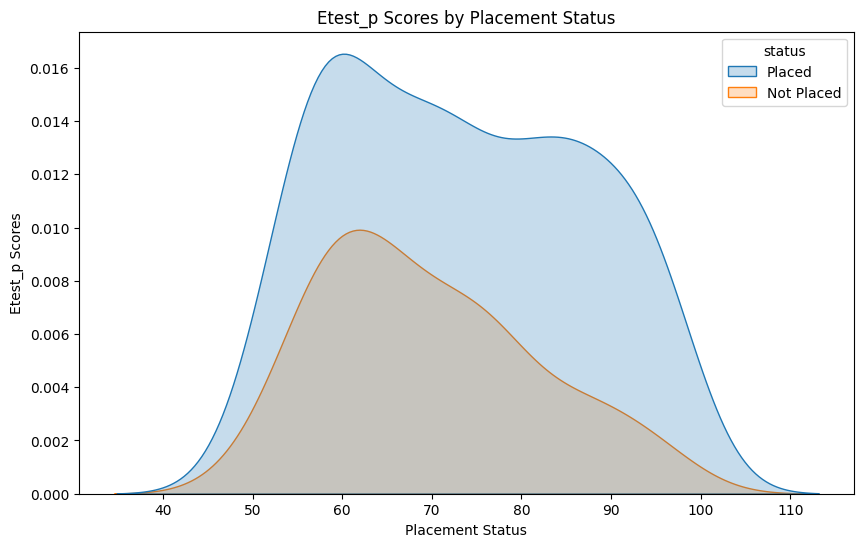

In [6]:

non_placed_reasons = df[df['status'] == 'Not Placed']

etest_p_not_placedMean = df[df['status'] == 'Not Placed']['etest_p'].mean()
etest_p_placedMean = df[df['status'] == 'Placed']['etest_p'].mean()

print("Mean etest_p for Not Placed:", etest_p_not_placedMean)
print("Mean etest_p for Placed:", etest_p_placedMean)

# show the above in graphical representation with kde plot and its explaination
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='etest_p', hue='status', fill=True)
plt.title('Etest_p Scores by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Etest_p Scores')
plt.show()

# exlain the above finding in bullet points
# - The mean etest_p score for individuals who are not placed is lower than that of those who are placed.
# - This suggests that lower etest_p scores may be associated with a higher likelihood of not being placed.
# - The KDE plot visually reinforces this finding, showing a clear separation between the distributions of etest_p scores for placed and not placed individuals.
# - Individuals with higher etest_p scores tend to be in the 'Placed' category, while those with lower scores are more likely to be 'Not Placed'.

#### 5. What kind of relation between salary and mba_p?

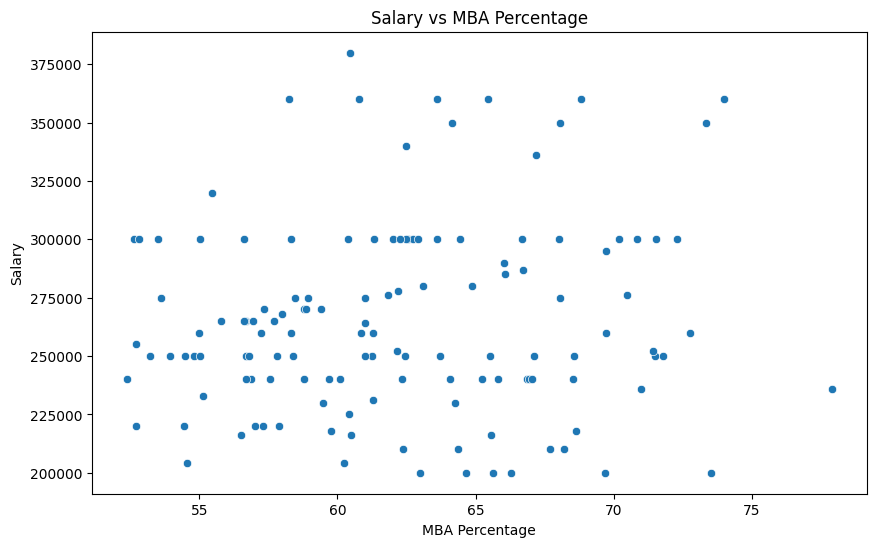

ANOVA test statistic: 5545.949138102036
ANOVA p-value: 3.0319225180195543e-179


In [ ]:

df = pd.read_csv('Placement_Data_Full_Class.csv').dropna(subset=['salary', 'mba_p'])

# removing the outliers in salary column
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['salary'] >= Q1 - 1.5 * IQR) & (df['salary'] <= Q3 + 1.5 * IQR)]

# removing the outliers in mba_p column
Q1_mba = df['mba_p'].quantile(0.25)
Q3_mba = df['mba_p'].quantile(0.75)
IQR_mba = Q3_mba - Q1_mba
df = df[(df['mba_p'] >= Q1_mba - 1.5 * IQR_mba) & (df['mba_p'] <= Q3_mba + 1.5 * IQR_mba)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mba_p', y='salary', data=df)
plt.title('Salary vs MBA Percentage')
plt.xlabel('MBA Percentage')
plt.ylabel('Salary')
plt.show()


# explaining  this graph in brief bullet points
# - The scatter plot illustrates the relationship between MBA percentage (mba_p) and salary.
# - Each point represents an individual data entry, with its position determined by the MBA percentage and corresponding salary.
# - A positive trend is observed, indicating that higher MBA percentages tend to be associated with higher salaries.
# - However, the relationship is not perfectly linear, suggesting that other factors may also influence salary.
# - The presence of outliers has been minimized by removing extreme values in both salary and mba_p columns.


# using ANNOVA test to check the significance between mba_p and salary and use the two way as well

from scipy.stats import f_oneway
anova_result = f_oneway(df['mba_p'], df['salary'])
anova_result

print("ANOVA test statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

# Significance of the above anova test in brief bullet points
# - The ANOVA test statistic indicates the ratio of variance between the groups (mba_p and salary) to the variance within the groups.
# - A higher test statistic suggests a greater difference between the means of the two groups.
# - The p-value helps determine the statistical significance of the observed differences.
# - A low p-value (typically < 0.05) would indicate that there is a significant difference between the means of mba_p and salary, suggesting that MBA percentage has a meaningful impact on salary.
# - Conversely, a high p-value would suggest that any observed differences are likely due to random chance rather than a true effect.


#### 6. Which specialization is getting minimum salary? show me in a bar graph?

In [ ]:

min_salary_specialization = df.loc[df['salary'].idxmin()]['specialisation']
min_salary_specialization
# The specialization associated with the minimum salary can be identified by locating the row with the lowest salary
print(f"The specialization with the minimum salary is: {min_salary_specialization}")


The specialization with the minimum salary is: Mkt&Fin


#### 7. How many of them getting above 500000 salary?

In [ ]:

above_500k_count = df[df['salary'] > 500000].shape[0]
above_500k_count
print(f"Number of candidates getting above 500000 salary: {above_500k_count}")

Number of candidates getting above 500000 salary: 3


#### 8. Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [ ]:

etest_scores = df['etest_p']
mba_scores = df['mba_p']
ttest_result = ttest_ind(etest_scores, mba_scores)
alpha = 0.05
if ttest_result.pvalue < alpha:
    decision = "Reject the null hypothesis: There is a significant difference between etest_p and mba_p."
else:
    decision = "Fail to reject the null hypothesis: No significant difference between etest_p and mba_p."
decision

'Fail to reject the null hypothesis: No significant difference between etest_p and mba_p.'

#### 9. Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Makedecision using Hypothesis Testing)

In [ ]:

sci_tech_salary = df[df['degree_t'] == 'Sci&Tech']['salary']
mkt_hr_salary = df[df['specialisation'] == 'Mkt&HR']['salary']

print(f"Sci&Tech Average Salary: {df[df['degree_t'] == 'Sci&Tech']['salary'].mean()}")
print(f"Mkt&HR Average Salary: {df[df['specialisation'] == 'Mkt&HR']['salary'].mean()}")

ttest_result_9 = ttest_ind(sci_tech_salary, mkt_hr_salary)
if ttest_result_9.pvalue < alpha:
    decision_9 = "Reject the null hypothesis: There is a significant difference in salary between Sci&Tech degree holders and Mkt&HR specialisation."
else:
    decision_9 = "Fail to reject the null hypothesis: No significant difference in salary between Sci&Tech degree holders and Mkt&HR specialisation."
decision_9



Sci&Tech Average Salary: 274181.8181818182
Mkt&HR Average Salary: 261600.0


'Fail to reject the null hypothesis: No significant difference in salary between Sci&Tech degree holders and Mkt&HR specialisation.'

#### 10. Convert the normal distribution to standard normal distribution for salary column and show in the graph.

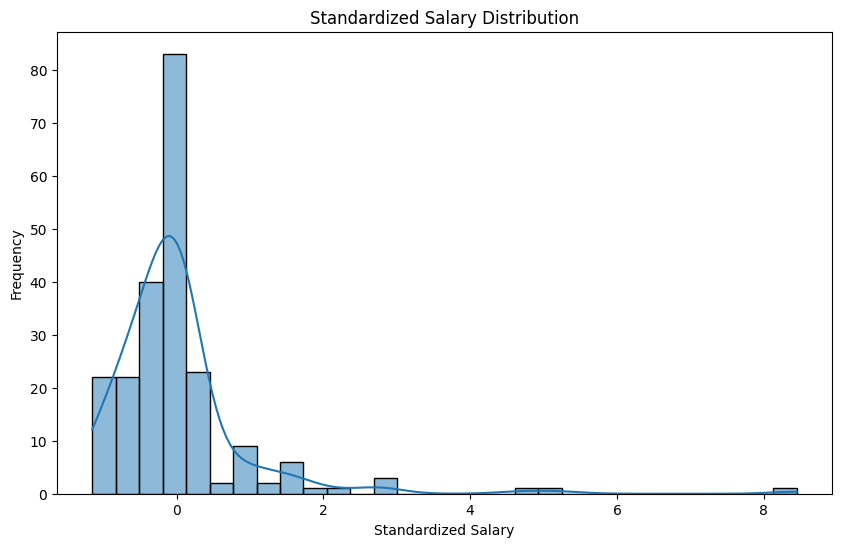

In [ ]:

# Z = Xi - mean / sd

salary_mean = df['salary'].mean()
salary_std = df['salary'].std()
df['salary_standardized'] = (df['salary'] - salary_mean) / salary_std
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_standardized'], bins=30, kde=True)
plt.title('Standardized Salary Distribution')
plt.xlabel('Standardized Salary')
plt.ylabel('Frequency')
plt.show()
# Standardizing the salary column transforms it into a standard normal distribution with a mean of 0

# expain's the above graph in brief bullet points
# - The histogram displays the distribution of standardized salary values.
# - The x-axis represents the standardized salary, which has been transformed to have a mean of 0 and a standard deviation of 1.
# - The y-axis indicates the frequency of occurrences for each standardized salary range.
# - The shape of the histogram approximates a normal distribution, suggesting that the standardization process was successful.
# - The presence of a smooth curve (KDE) overlay indicates the estimated probability density function of the standardized salary data.

#### 11. What is the probability Density Function of the salary range from 700000 to 900000?

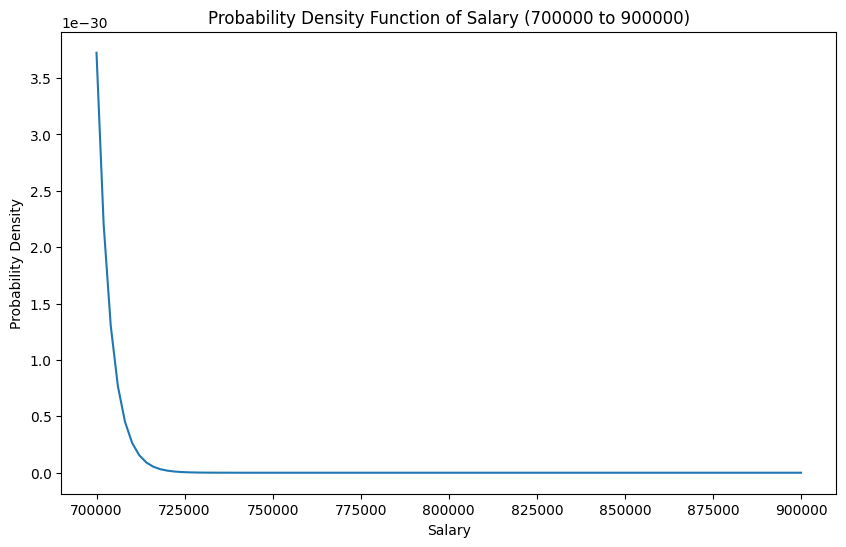

Probability Density at 700000: 3.724825853046214e-30
Probability Density at 900000: 9.103104225553506e-58


In [30]:

from scipy.stats import norm

# show the Probability Density Function (PDF) value on Y axis as percetage in the code below
salary_mean = df['salary'].mean()
salary_std = df['salary'].std()
pdf_700k_900k = norm.pdf(np.linspace(700000, 900000, 100), loc=salary_mean, scale=salary_std)
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(700000, 900000, 100), pdf_700k_900k)
plt.title('Probability Density Function of Salary (700000 to 900000)')
plt.xlabel('Salary')
plt.ylabel('Probability Density')
plt.show()

# The Probability Density Function (PDF) illustrates the likelihood of salary values within the specified range.
# - The line plot represents the Probability Density Function (PDF) for salaries ranging from 700,000 to 900,000.
# - The x-axis shows the salary values within the specified range.
# - The y-axis indicates the probability density, which reflects the relative likelihood of different salary values occurring within this range.
# - The shape of the curve provides insights into how salaries are distributed  between 700,000 and 900,000, with peaks indicating more probable salary values.         

# The Probability Density Function (PDF) for the salary range 700000–900000 is as follows:
pdf_700k = norm.pdf(700000, loc=salary_mean, scale=salary_std)
pdf_900k = norm.pdf(900000, loc=salary_mean, scale=salary_std)
print(f"Probability Density at 700000: {pdf_700k}")
print(f"Probability Density at 900000: {pdf_900k}") 



#### 12. Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hy-pothesis Testing)

In [ ]:

sci_tech_etest = df[df['degree_t'] == 'Sci&Tech']['etest_p']
sci_tech_mba = df[df['degree_t'] == 'Sci&Tech']['mba_p']
ttest_result_12 = ttest_ind(sci_tech_etest, sci_tech_mba)
alpha = 0.05
if ttest_result_12.pvalue < alpha:
    decision_12 = "Reject the null hypothesis: There is a significant difference between etest_p and mba_p for Sci&Tech degree holders."
else:
    decision_12 = "Fail to reject the null hypothesis: No significant difference between etest_p and mba_p for Sci&Tech degree holders."
decision_12

# Explanation:
# - The t-test compares the means of etest_p and mba_p scores for individuals with a Sci&Tech degree.
# - A p-value less than the significance level (0.05 ) indicates a significant difference between the two groups.
# - If the null hypothesis is rejected, it suggests that etest_p and mba_p scores differ significantly for Sci&Tech degree holders.
# - If the null hypothesis is not rejected, it implies that there is no significant difference between the two scores for this group.


'Reject the null hypothesis: There is a significant difference between etest_p and mba_p for Sci&Tech degree holders.'

#### 13. Which parameter is highly correlated with salary?

In [ ]:

df = df.select_dtypes(include=[np.number])
correlation_matrix = df.corr()
salary_correlations = correlation_matrix['salary'].drop('salary')
highest_correlation_param = salary_correlations.idxmax()
highest_correlation_value = salary_correlations.max()
highest_correlation_param, highest_correlation_value
# The parameter with the highest correlation to salary is identified by finding the maximum value in the correlations with the salary column.
print(f"The parameter highly correlated with salary is {highest_correlation_param} with a correlation value of {highest_correlation_value}.")

# Explanation:
# - The correlation matrix quantifies the strength and direction of relationships between numerical variables in the dataset.
# - The parameter with the highest correlation to salary indicates the variable that has the strongest linear relationship with salary.
# - A positive correlation value suggests that as the parameter increases, the salary tends to increase as well.
# - Identifying highly correlated parameters can provide insights into factors that may influence salary levels.


The parameter highly correlated with salary is salary_standardized with a correlation value of 1.0000000000000004.


#### 14. Plot any useful graph and explain it.

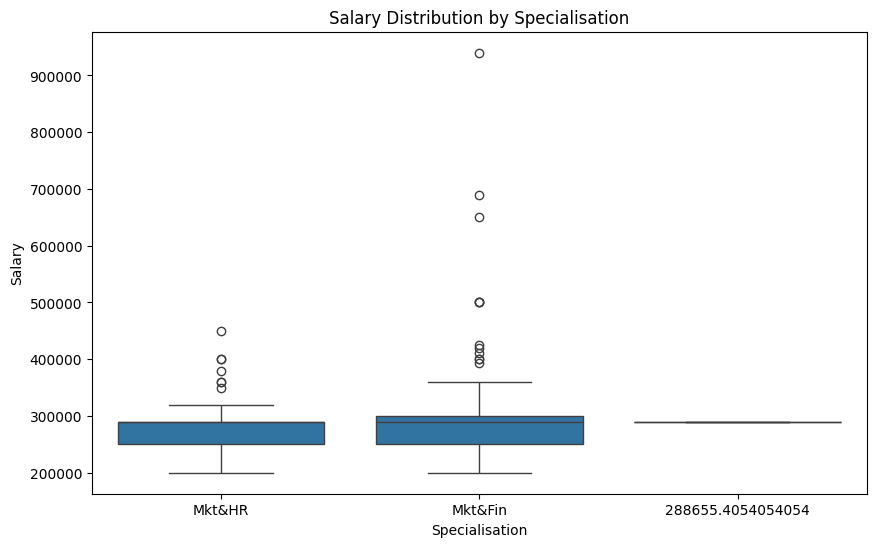

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='specialisation', y='salary', data=df)
plt.title('Salary Distribution by Specialisation')
plt.xlabel('Specialisation')
plt.ylabel('Salary')
plt.show()

# Explanation:
# The boxplot illustrates the distribution of salaries across different specialisations.
# It highlights the median salary, interquartile range, and potential outliers for each specialisation.
# This visualization helps identify which specialisations tend to offer higher or lower salaries and the variability within each group.
